In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from scipy import ndimage
from scipy.interpolate import griddata
import os

%matplotlib inline

No labels for 193745
No labels for 193730
No labels for 193747
No labels for 193734
No labels for 195447
No labels for 193756
No labels for 193759
No labels for 195439
No labels for 193748
No labels for 193753
No labels for 195436


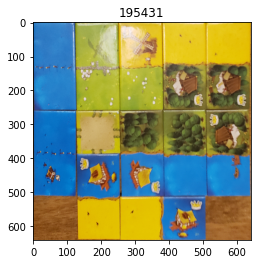

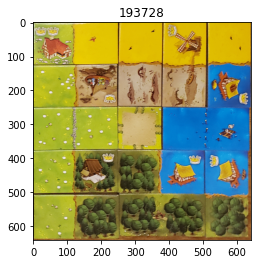

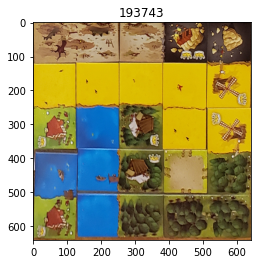

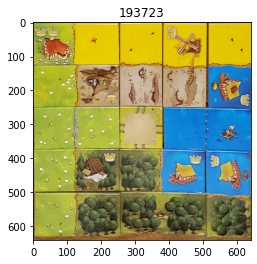

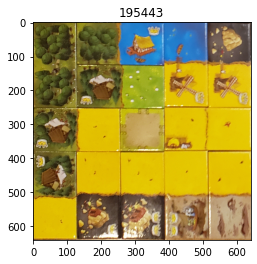

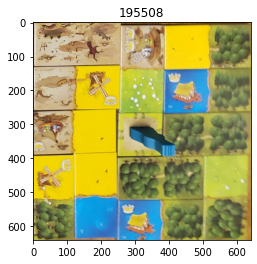

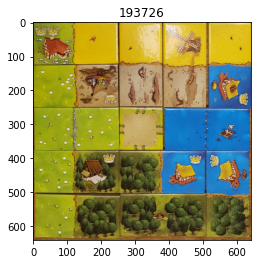

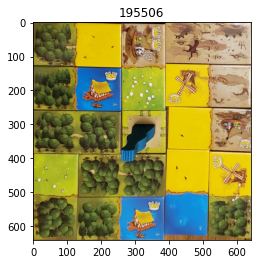

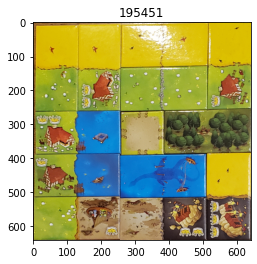

In [6]:

corners = {
    "195508": [ (2568, 2769), (2074, 1984), (2975, 1686), (3750, 2294) ],
    "195451": [ (1521, 672), (605, 1354), (1964, 2064), (2632, 1126)],
    "195443": [ (322, 1373), (1547, 1646), (1956, 673), (931, 522)],
    "193723": [ (958, 1805), (3176, 1730), (2702, 887), (1312, 920) ],
    "193726": [ (102, 2437), (2549, 2204), (2213, 817), (593, 888) ],
    "193728": [ (1671, 1962), (3600, 2242), (3064, 911), (1677, 499) ],
    "193743": [ (2078, 1316), (3255, 1312), (3034, 697), (2099, 703) ],
    "195431": [ (344, 2326), (2719, 1997), (2232, 732), (567, 795) ],
    "195506": [ (491, 1677), (2185, 2115), (2656, 776), (1293, 617) ]
}

# 0 - Desert
# 1 - Grass
# 2 - Ocean
# 3 - Forest
# 4 - Swamp
# 5 - Mine
# 6 - Home
terrainTruth = {
    "195451": [ 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1,
                1, 2, 6, 3, 3,
                1, 2, 2, 2, 0,
                1, 4, 4, 5, 5 ],

    "195508": [
        4, 4, 4, 0, 3,
        4, 0, 1, 2, 3,
        4, 0, 6, 3, 3, 
        0, 0, 3, 3, 1, 
        3, 2, 2, 3, 3
    ],
    
    "195443": [
        3,3,2,2,5,
        3,3,1,0,0,
        3,0,6,0,0,
        3,0,0,0,0,
        0,5,5,4,4
    ],
    
    "193723": [
        1, 0, 0, 0, 0,
        1, 4, 4, 4, 2,
        1, 1, 6, 2, 2, 
        1, 3, 3, 2, 2,
        1, 3, 3, 3, 3
    ],
    
    "193726": [
        1, 0, 0, 0, 0,
        1, 4, 4, 4, 2,
        1, 1, 6, 2, 2, 
        1, 3, 3, 2, 2,
        1, 3, 3, 3, 3
    ],
    
    "193728": [
        1, 0, 0, 0, 0,
        1, 4, 4, 4, 2,
        1, 1, 6, 2, 2, 
        1, 3, 3, 2, 2,
        1, 3, 3, 3, 3
    ],
    
    "193743": [
        4, 4, 4, 5, 5,
        0, 0, 0, 0, 0, 
        1, 2, 3, 0, 0,
        2, 2, 3, 6, 3,
        1, 2, 3, 3, 3
    ],
    
    "195431": [
        2, 1, 0, 0, 0,
        2, 1, 1, 3, 3, 
        2, 6, 3, 3, 3,
        2, 2, 2, 2, 2,
        7, 0, 0, 2, 7
    ],
    
    "195506": [
        3, 0, 4, 4, 4,
        3, 2, 1, 0, 4,
        3, 3, 6, 0, 4,
        1, 3, 3, 0, 0,
        3, 3, 2, 2, 3
    ]
}

terrainCrowns = {
    "195451": [ 0, 0, 0, 0, 0,
        0, 2, 0, 0, 1,
        2, 0, 0, 0, 0,
        1, 0, 0, 0, 0,
        0, 1, 0, 2, 3 ],
    
    "195508": [
        0, 0, 0, 0, 0,
        0, 1, 0, 1, 0,
        1, 0, 0, 0, 0,
        1, 0, 0, 0, 0,
        0, 0, 1, 0, 0],
    
    "195443": [0,0,1,0,0,
        0,1,0,1,1,
        1,0,0,0,0,
        1,0,0,0,0,
        0,1,2,2,0],
    
    "193723": [
        2, 0, 0, 1, 0,
        0, 1, 0, 0, 1,
        0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 
        0, 0, 0, 0, 0
    ],
    
    "193726": [
        2, 0, 0, 1, 0,
        0, 1, 0, 0, 1,
        0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 
        0, 0, 0, 0, 0
    ],
    
    "193728": [
        2, 0, 0, 1, 0,
        0, 1, 0, 0, 1,
        0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 
        0, 0, 0, 0, 0
    ],
    
    "193743": [
        0, 0, 0, 2, 0,
        0, 0, 0, 0, 1,
        1, 0, 1, 0, 1,
        0, 0, 1, 0, 0,
        1, 0, 0, 0, 0
    ],
    
    "195431": [
        0, 0, 0, 0, 0,
        0, 0, 0, 1, 1,
        0, 0, 0, 0, 1,
        0, 1, 1, 0, 0,
        0, 0, 0, 1, 0
    ],
    
    "195506": [
        0, 0, 2, 0, 0,
        0, 1, 0, 1, 0,
        0, 0, 0, 0, 1,
        0, 0, 0, 0, 1,
        0, 0, 1, 0, 0
    ]
}

# In a real genius move,
# I did not keep consistent terrain labels
# from file to file.
fixTerrainMapping = {
    0: 0,
    1: 3,
    2: 2,
    3: 1,
    4: 4,
    5: 5, 
    6: 6,
    7: 7    
}

tile_res = 128


for file in os.listdir('dev_images/'):
    label = (file.split("_")[1].split("."))[0]
    board = cv2.cvtColor(cv2.imread("dev_images/" + file), cv2.COLOR_BGR2RGB)

    if label not in corners:
        print("No labels for {0}".format(label))
        continue
    
    dst = np.array([[0, 0], [5*tile_res - 1, 0], [5*tile_res - 1, 5*tile_res - 1], [0, 5*tile_res - 1]], dtype="float32")
    src = np.array([[s[0],s[1]] for s in corners[label]], dtype="float32")

    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(board, M, (5*tile_res, 5*tile_res))
    plt.figure()
    plt.title(label)
    plt.imshow(warped)
    for i in range(5):
        for j in range(5):
            idx = 5*i + j
            
            # I goofed and used wrong terrain labels so converting them back to consistent format
            terrain = fixTerrainMapping[terrainTruth[label][idx]]
            crowns = terrainCrowns[label][idx]
            
            crop = warped[tile_res*i:tile_res*(i+1), tile_res*j:tile_res*(j+1)]
            crop2 = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
            name = "training/" + label + "_" + str(idx) + "_" + \
                str(terrain) + "_" + \
                str(crowns) + ".png"
            cv2.imwrite(name, crop2)